# Part II - Ford GoBike System Data Exploration
## by Ashwell Dickson

## Investigation Overview


> In this exploration into the Ford GoBike System dataset the aim was to establish between the duration of bike trips and the other attributes the system captures for every trip. Dependent variables of interest included the rider's gender and age.


## Dataset Overview

> This dataset consists of information on bike riding trips captured on the Ford GoBike ride sharing system. The data in this dataset covers the San Francisco bay area. This dataset initialy included 183,411 recorded trips, with 16 attributes that gives further details on the trip and the user.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [4]:
# Data Wrangling as per Part 1

# Drop records with Nan values
df = df.dropna()
df.reset_index(drop = True, inplace = True)

# Changing the data type of start_time and end_time to datetime.
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

# Changing the data type of start_station_id, end_station_id and member_birth_year to int64
df.start_station_id = df.start_station_id.astype('int64')
df.end_station_id = df.end_station_id.astype('int64')
df.member_birth_year = df.member_birth_year.astype('int64')

# Create a column showing the user's age using the member_birth_year column, subtracting it from 2019, the year the dataset was pulled.
df['member_age'] = 2019 - df['member_birth_year']

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Trip Duration

> The following subplots show that most of our data is distributed over the lower trip duration range and with the younger group of the members. The younger members are between 20 and 40 years have the highest trip duration in the dataset.


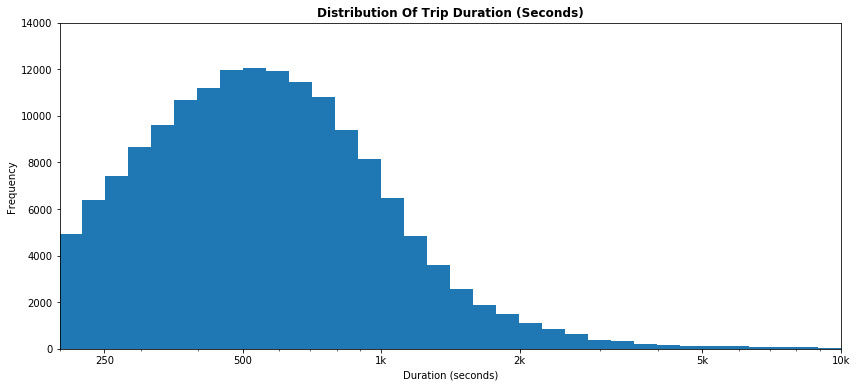

In [12]:
# Log scaled histogram for duration_sec
log_binsize = 0.05
bins = 10 ** np.arange(1.5, np.log10(df['duration_sec'].max()) + log_binsize, log_binsize)

plt.figure(figsize = [14,6])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([250, 500, 1e3, 2e3, 5e3, 1e4, 2e4, 4e4, 8e4], [250, 500, '1k', '2k', '5k', '10k', '20k', '40k', '80k'])
plt.title('Distribution of Trip Duration (seconds)'.title(), weight = 'bold')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.axis([200, 10000, 0, 14000]);

## Trip Duration vs Member Age

> The following subplots show that most of our data is distributed over the lower trip duration range and with the younger group of the members. The younger members are between 20 and 40 years have the highest trip duration in the dataset.

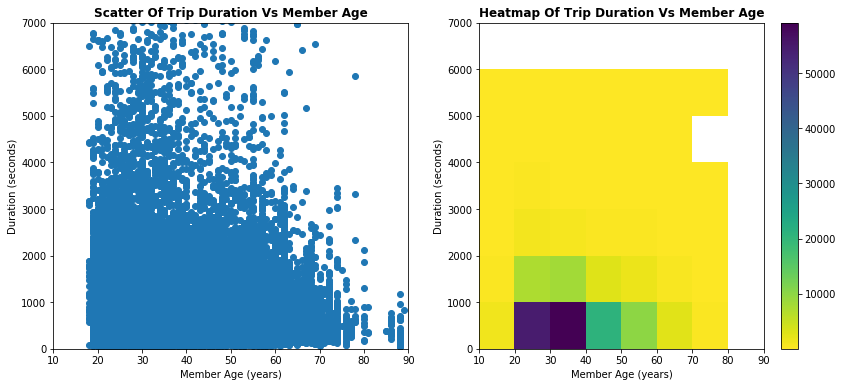

In [18]:
plt.figure(figsize = [14, 6])
plt.title('Distribution of Trip Duration vs Member Age'.title(), weight = 'bold', loc = 'left')

plt.subplot(1, 2, 1)
plt.scatter(data = df, x = 'member_age', y = 'duration_sec')
plt.title('Scatter of Trip Duration vs Member Age'.title(), weight = 'bold')
plt.xlabel('Member Age (years)')
plt.ylabel('Duration (seconds)')
plt.axis([10, 90, 0, 7000])

plt.subplot(1, 2, 2)
bins_x = np.arange(10, 90, 10)
bins_y = np.arange(0, 7000, 1000)
plt.hist2d(data = df, x = 'member_age', y = 'duration_sec', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])
plt.title('Heatmap of Trip Duration vs Member Age'.title(), weight = 'bold')
plt.xlabel('Member Age (years)')
plt.ylabel('Duration (seconds)')
plt.axis([10, 90, 0, 7000])
plt.colorbar();

## Trip Duration vs Member Age and Member Gender

> The following plot will give dive deeper into the member's by details by adding their gender to mix. We can see how the males make up the majority of the data in the dataset and how they are very active from 20 years of age until 50 years of age. We can see that the Other gender has a bimodal peak 30 years of age and again at 60 years of age.

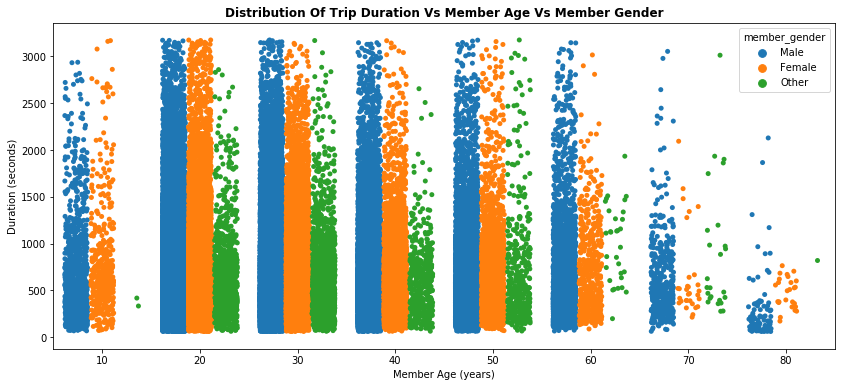

In [19]:
df['member_age_cat'] = ((df['member_age']//10)*10).astype(int)
plt.figure(figsize = [14,6])
sb.stripplot(data = df.query('member_age <= 90 and duration_sec <= duration_sec.quantile(0.99)'),
             x = 'member_age_cat', y = 'duration_sec', hue = 'member_gender', jitter = 0.35, dodge = True)
plt.title('Distribution of Trip Duration vs Member Age vs Member Gender'.title(), weight = 'bold')
plt.xlabel('Member Age (years)')
plt.ylabel('Duration (seconds)');

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [20]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 538945 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
